In [ ]:
# if you dont already have the required libraries for this notebook, you can install them by running this codeblock
!pip install pandas matplotlib ipympl

In [1]:
import os 
import pandas as pd
%matplotlib widget
import matplotlib.pyplot as plt

In [2]:
# Load the data
stat_file = os.path.join('..','out','state_stats.csv')

#set path where to save files
out_path = os.path.join('..','out')

df = pd.read_csv(stat_file)

df = df.dropna()

df.head()

,Unnamed: 0,State_Name,Datacenter_Count,Industrial power price,Internet Speed,temperature,relative_humidity,densityMi,Renewable
0,0,ALABAMA,11.0,5.87,84.26,18.555556,71.6,101.55066,9.0
2,2,ARIZONA,66.0,6.07,81.22,16.000000,38.5,65.99824,13.0
3,3,ARKANSAS,3.0,5.89,63.18,17.166667,70.9,59.36504,7.0
4,4,CALIFORNIA,259.0,14.27,94.45,14.555556,61.0,249.64706,36.0
5,5,COLORADO,52.0,7.48,86.05,7.722222,54.1,57.06356,33.0


In [3]:
def plot_3d(df, x_column, y_column, z_column, save_filename=None):
    # Creating the 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    sc = ax.scatter(df[x_column], df[y_column], df[z_column], c=df[z_column], cmap='viridis')

    plt.title(f'3D plot showing:\n{x_column} (X), {y_column} (Y) & {z_column} (Z)')
    ax.set_xlabel(f'{x_column} (X)')
    ax.set_ylabel(f'{y_column} (Y)')
    ax.set_zlabel(f'{z_column} (Z)')

    # Add color bar which maps values to colors
    colorbar = plt.colorbar(sc, ax=ax)
    colorbar.set_label(z_column)

    if save_filename:
        plt.savefig(os.path.join(out_path, save_filename))

    plt.show()

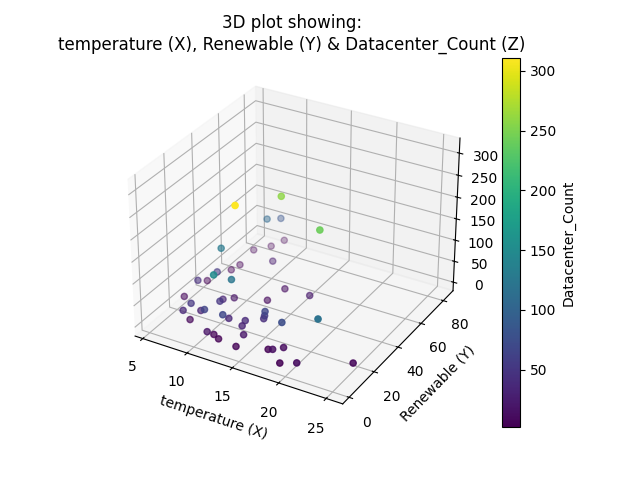

In [4]:
plot_3d(df, 
        x_column = 'temperature', 
        y_column = 'Renewable', 
        z_column = 'Datacenter_Count',
        save_filename='3D plot.png')

In [5]:
def plot_2d_3d(df, x_column, y_column, color_column, save_filename=None):
    # Extract data from DataFrame
    x = df[x_column]
    y = df[y_column]
    color_values = df[color_column]

    # Create the scatter plot
    plt.figure()
    sc = plt.scatter(x, y, c=color_values, cmap='viridis')

    plt.title(f'Scatter plot showing:\n{x_column} (X), {y_column} (Y) & {color_column} (Color)')
    plt.xlabel(f'{x_column}')
    plt.ylabel(f'{y_column}')

    # Add color bar which maps values to colors
    colorbar = plt.colorbar(sc)
    colorbar.set_label(color_column)

    # Optionally save the plot
    if save_filename:
        plt.savefig(os.path.join(out_path, save_filename))
        
    plt.show()

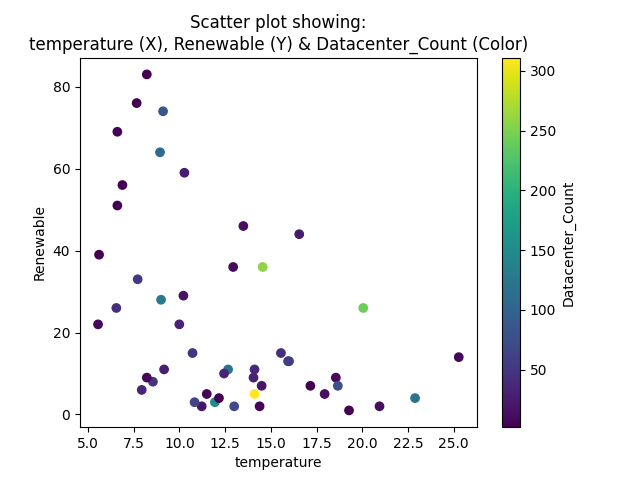

In [6]:
plot_2d_3d(df, 
        x_column = 'temperature', 
        y_column = 'Renewable', 
        color_column = 'Datacenter_Count',
        save_filename='2D 3D plot.png')